# K-Means Clustering:

Here I am going to share with you everything I know about K-Means and Clustering. All the information I gathered in these files was from free educational resources that I collected and improved with the help of my own knowledge. A link to all the resources I used can be seen at the end of this file. This collection is completely free and you can freely share it with other friends. I hope you can help increase your knowledge in machine learning.

## Table of Contents: <a class="anchor" id="contents"></a>
* [What is KMeans?](#what_is_kmeans)
* [About Dataset](#about_dataset)
* [Preprocessing](#preprocessing)
* [Clustering and Modeling](#clustering)
* [Model Evaluation](#model_evaluation)
* [Resources](#resources)

## -What is KMeans? <a class="anchor" id="what_is_kmeans"></a>
here are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*    Customer segmentation
*    Understand what the visitors of a website are trying to accomplish
*    Pattern recognition
*    Machine learning
*    Data compression

In this notebook we practice k-means clustering with 2 examples:

*    k-means on a random generated dataset
*    Using k-means for customer segmentation


<img src="https://opg.optica.org/getImage.cfm?img=QC5sYXJnZSxvZS0yNS0yMi0yNzU3MC1nMDAx">

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:

*    Specify number of clusters K.
*    Initialize centroids by first shuffling the dataset and then randomly selecting K data   points for the centroids without replacement.
*    Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

*    Compute the sum of the squared distance between data points and all centroids.
*    Assign each data point to the closest cluster (centroid).
*    Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

The objective function is:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/26f6cae7ba4d68b88acc3dac37c595da607e91f6">

where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0. Also, μk is the centroid of xi’s cluster.

It’s a minimization problem of two parts. We first minimize J w.r.t. wik and treat μk fixed. Then we minimize J w.r.t. μk and treat wik fixed. Technically speaking, we differentiate J w.r.t. wik first and update cluster assignments (E-step). Then we differentiate J w.r.t. μk and recompute the centroids after the cluster assignments from previous step (M-step).

Few things to note here:

*    Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.
*    Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may stuck in a local optimum and may not converge to global optimum. Therefore, it’s recommended to run the algorithm using different initializations of centroids and pick the results of the run that that yielded the lower sum of squared distance.
*    Assignment of examples isn’t changing is the same thing as no change in within-cluster variation:

* [go to contents](#contents)

## -About Dataset: <a class="anchor" id="about_dataset"></a>

### `Mall_Customers.csv`:

This is a set of customers of a store that we are going to cluster with the help of kmeans algorithm and put customers in different categories and study their behavior.

**columns:**

*  CustomerID
*  Gender
*  Age
*  Annual Income
*  Spending Score

## -Preprocessing: <a class="anchor" id="preprocessing"></a>

### Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


### 1-Checking Missing Values:

In [3]:
data.isna().sum()

CustomerID        0
Gender            0
Age               3
Annual Income     5
Spending Score    4
dtype: int64

### 2-Checking duplicates:

In [4]:
data.duplicated().sum()

0

### 3-Replacing 'Female' and 'Male' with 1, 0:

In [5]:
data.Gender.replace({"Male": 0, "Female": 1}, inplace=True)

### 4-Imputing Nulls:

In [6]:
from sklearn.impute import KNNImputer
imputer = KNNImputer().fit(data)
data = imputer.transform(data)

### plotting Data:

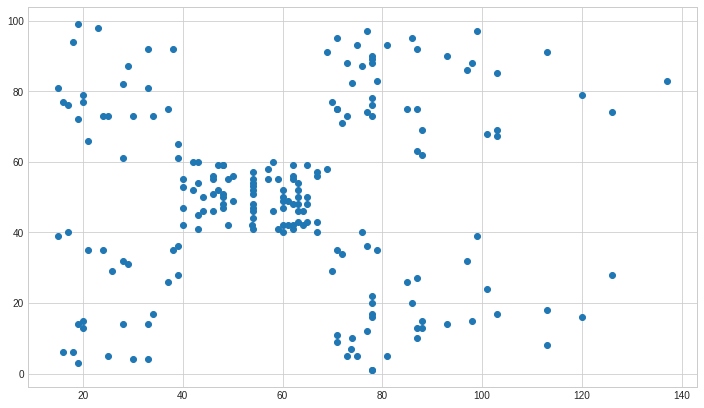

In [7]:
plt.rcParams["figure.figsize"] = (12, 7)
plt.scatter(x=data[::,3], y=data[::,4]);

* [go to contents](#contents)

## -Clustering and Modeling: <a class="anchor" id="clustering"></a>

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(data)

KMeans(n_clusters=5)

### Plotting:

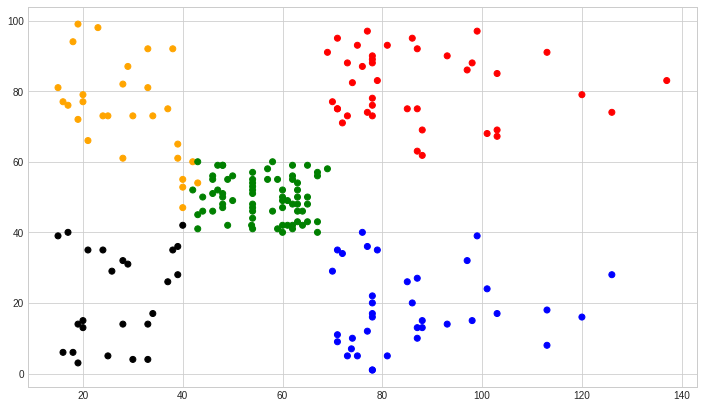

In [9]:
colors = np.array(['red', 'green', 'blue', 'orange', 'black'])
plt.scatter(data[::, 3], data[::, 4], c=colors[model.labels_])
plt.show()

* [go to contents](#contents)

## -Model Evaluation: <a class="anchor" id="model_evaluation"></a>


### Silhouette score:

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

*    Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
*    Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

Silhouette score, S, for each sample is calculated using the following formula:

\(S = \frac{(b - a)}{max(a, b)}\)

In [10]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data, model.labels_))

0.43957158200306806


### Checking Max Silhouettes:

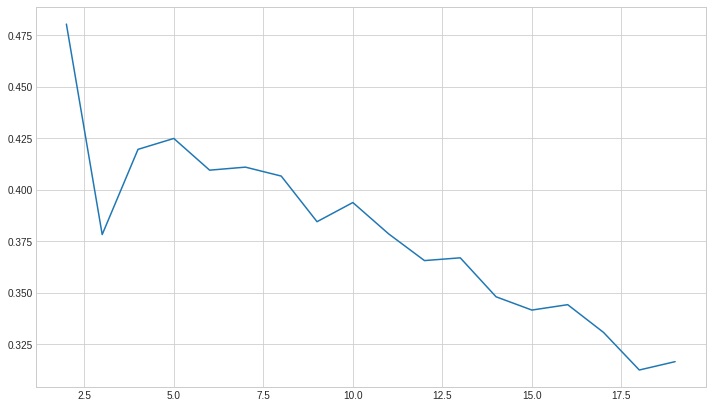

In [11]:
silhouettes = []
for n_clusters in range(2, 20):
    model = KMeans(n_clusters, max_iter=100).fit(data)
    silhouettes.append(silhouette_score(data, model.labels_))
plt.plot(range(2, 20), silhouettes)
plt.show()

* [go to contents](#contents)

## -Resources: <a class="anchor" id="resources"></a>

   *    Edx IBM Developer Skills Network, Machine Learning Course With Saaed Aghabozorgi & Joseph Santarcangelo.
   *    Maktabkhooneh Machine Learning With Jadi Course.
   *    https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

* [go to contents](#contents)